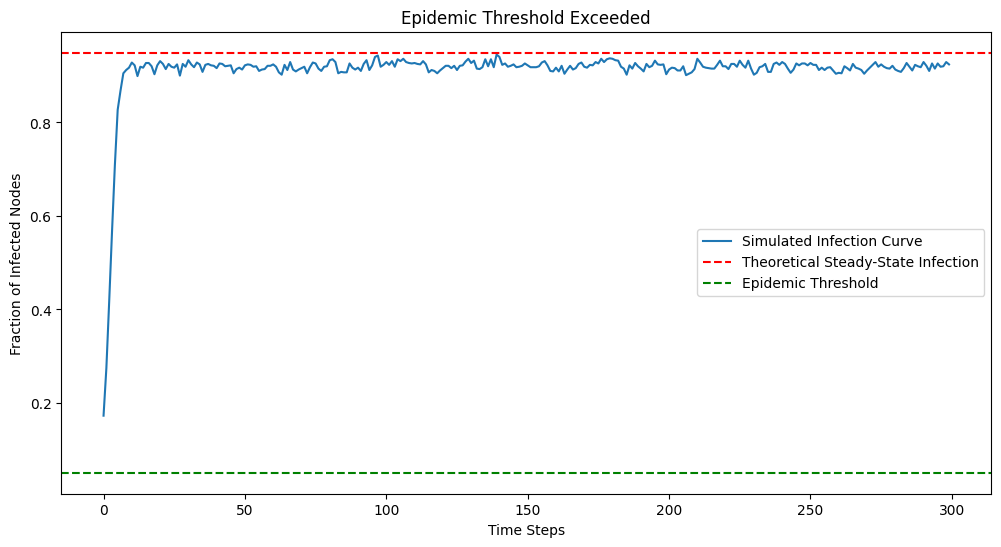

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_sis_er(num_nodes, probability, beta, gamma, initial_infected_fraction, num_steps):
    """
    Simulate the SIS model on an Erdős-Rényi graph.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - probability: Probability of edge creation in the ER graph.
    - beta: Infection probability.
    - gamma: Recovery probability.
    - initial_infected_fraction: Initial fraction of infected nodes.
    - num_steps: Number of simulation steps.

    Returns:
    - infection_curve: Fraction of infected nodes at each time step.
    - avg_degree: Average degree of the ER graph.
    - epidemic_threshold: Analytical epidemic threshold.
    """
    # Create an Erdős-Rényi graph
    G = nx.erdos_renyi_graph(num_nodes, probability)

    # Initialize states
    states = {node: 'S' for node in G.nodes}
    initial_infected = random.sample(list(G.nodes), int(initial_infected_fraction * num_nodes))

    for node in initial_infected:
        states[node] = 'I'

    # Average degree of the graph
    degrees = [degree for _, degree in G.degree()]
    avg_degree = np.mean(degrees)

    # Analytical epidemic threshold
    epidemic_threshold = gamma / (beta * avg_degree)

    infection_curve = []

    # Simulation
    for _ in range(num_steps):
        new_states = states.copy()
        infected_count = 0

        for node in G.nodes:
            if states[node] == 'S':
                # Susceptible node becomes infected with probability based on infected neighbors
                infected_neighbors = [neighbor for neighbor in G.neighbors(node) if states[neighbor] == 'I']
                infection_prob = 1 - (1 - beta) ** len(infected_neighbors)
                if random.random() < infection_prob:
                    new_states[node] = 'I'
            elif states[node] == 'I':
                # Infected node recovers with probability gamma
                if random.random() < gamma:
                    new_states[node] = 'S'

            # Count infected nodes
            if new_states[node] == 'I':
                infected_count += 1

        states = new_states
        infection_curve.append(infected_count / num_nodes)

    return infection_curve, avg_degree, epidemic_threshold

# Parameters
num_nodes = 1000
probability = 0.01
beta = 0.1
gamma = 0.05
initial_infected_fraction = 0.1
num_steps = 300

# Simulate
infection_curve, avg_degree, epidemic_threshold = simulate_sis_er(
    num_nodes, probability, beta, gamma, initial_infected_fraction, num_steps
)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(infection_curve, label='Simulated Infection Curve')

# Overlay theoretical steady-state infection level
if beta * avg_degree > gamma:
    steady_state_infection = 1 - (gamma / (beta * avg_degree))
    plt.axhline(steady_state_infection, color='r', linestyle='--', label='Theoretical Steady-State Infection')
    plt.title('Epidemic Threshold Exceeded')
else:
    plt.axhline(0, color='r', linestyle='--', label='No Epidemic (Below Threshold)')
    plt.title('Epidemic Threshold Not Exceeded')

plt.axhline(epidemic_threshold, color='g', linestyle='--', label='Epidemic Threshold')
plt.xlabel('Time Steps')
plt.ylabel('Fraction of Infected Nodes')
plt.legend()
plt.show()


In [ ]:
from IPython.display import IFrame

# Path to the generated PDF file
pdf_path = "sis_model_formulas.pdf"

# Display the PDF in the notebook
IFrame(pdf_path, width=800, height=600)


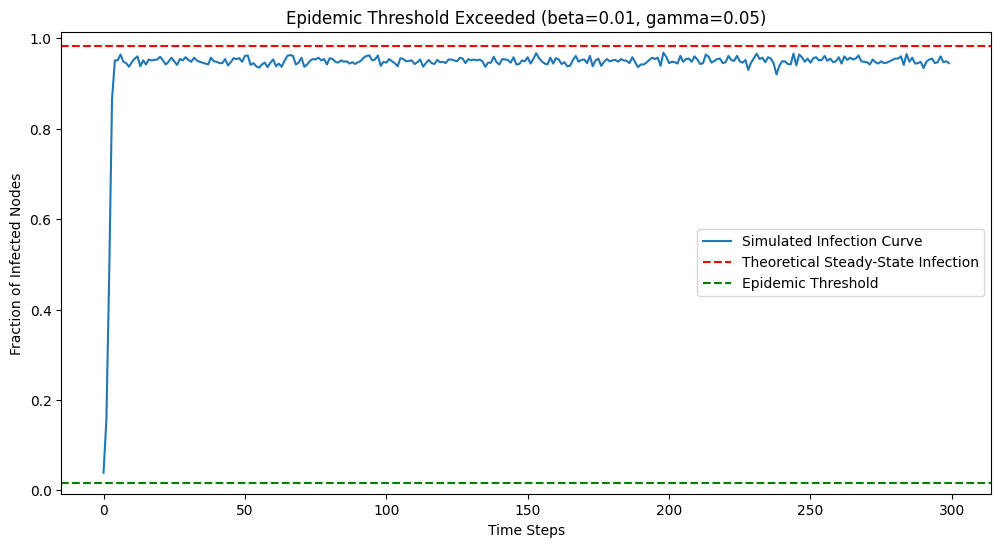

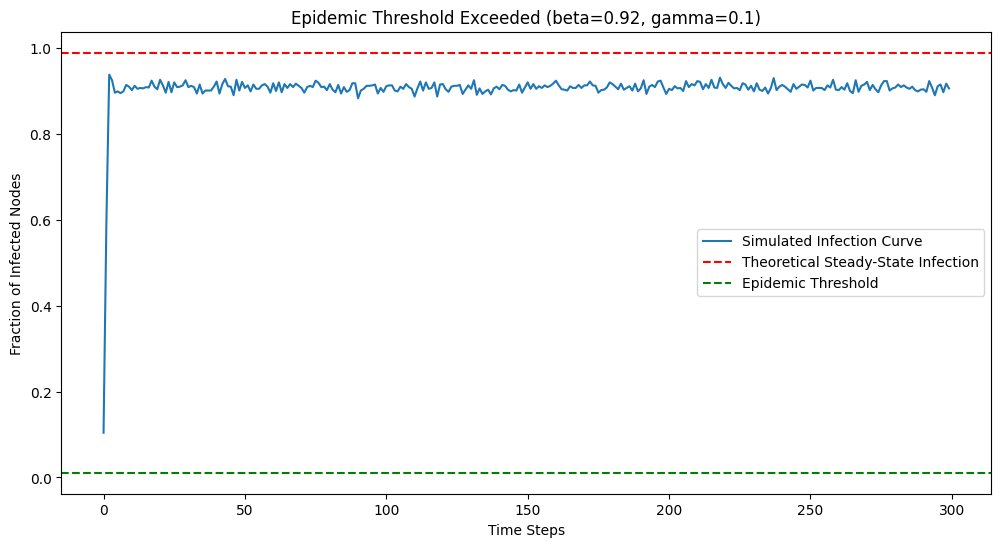

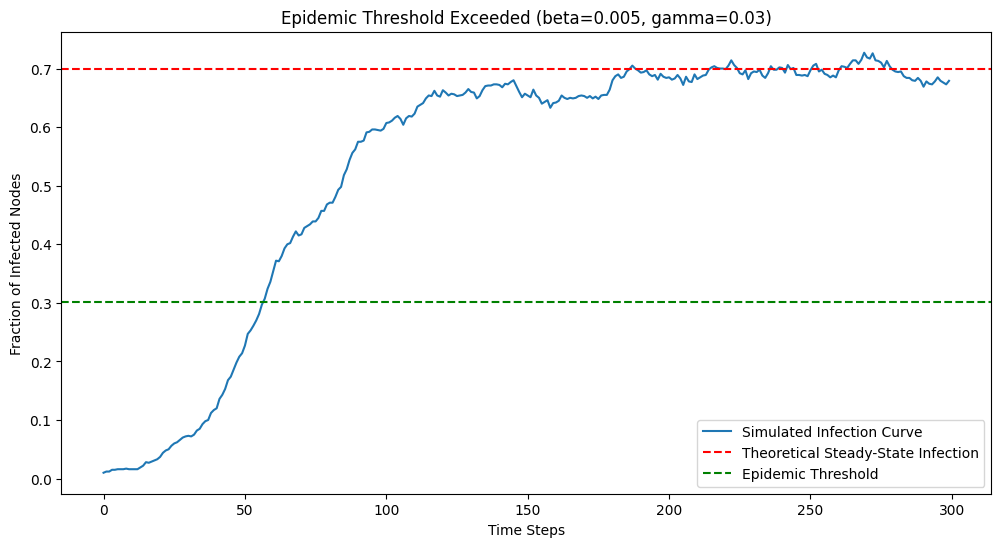

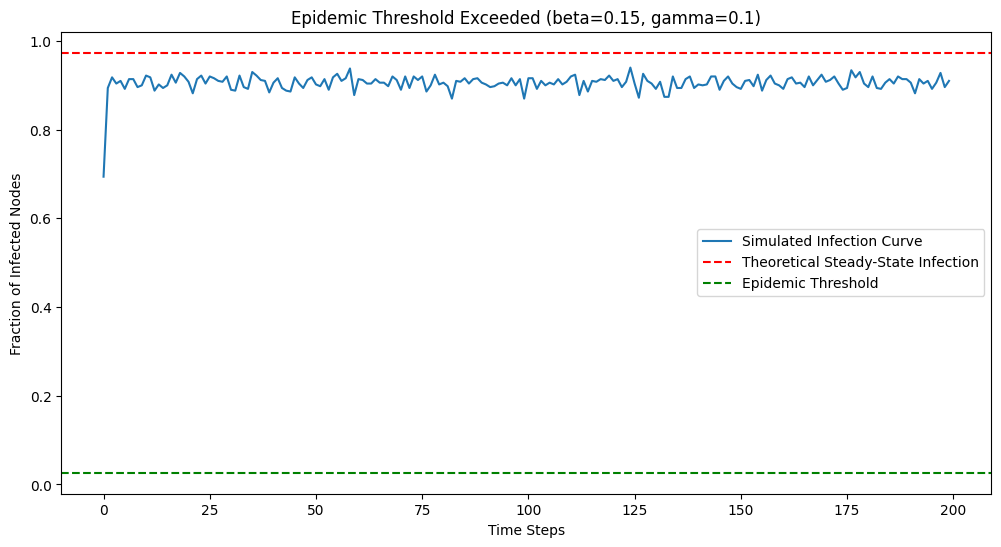

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_sis_er(num_nodes, probability, beta, gamma, initial_infected_fraction, num_steps):
    """
    Simulate the SIS model on an Erdős-Rényi graph.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - probability: Probability of edge creation in the ER graph.
    - beta: Infection probability.
    - gamma: Recovery probability.
    - initial_infected_fraction: Initial fraction of infected nodes.
    - num_steps: Number of simulation steps.

    Returns:
    - infection_curve: Fraction of infected nodes at each time step.
    - avg_degree: Average degree of the ER graph.
    - epidemic_threshold: Analytical epidemic threshold.
    """
    # Create an Erdős-Rényi graph
    G = nx.erdos_renyi_graph(num_nodes, probability)

    # Initialize states
    states = {node: 'S' for node in G.nodes}
    initial_infected = random.sample(list(G.nodes), int(initial_infected_fraction * num_nodes))
    for node in initial_infected:
        states[node] = 'I'

    # Average degree of the graph
    degrees = [degree for _, degree in G.degree()]
    avg_degree = np.mean(degrees)

    # Analytical epidemic threshold
    epidemic_threshold = gamma / (beta * avg_degree)

    infection_curve = []

    # Simulation
    for _ in range(num_steps):
        new_states = states.copy()
        infected_count = 0

        for node in G.nodes:
            if states[node] == 'S':
                # Susceptible node becomes infected with probability based on infected neighbors
                infected_neighbors = [neighbor for neighbor in G.neighbors(node) if states[neighbor] == 'I']
                infection_prob = 1 - (1 - beta) ** len(infected_neighbors)
                if random.random() < infection_prob:
                    new_states[node] = 'I'
            elif states[node] == 'I':
                # Infected node recovers with probability gamma
                if random.random() < gamma:
                    new_states[node] = 'S'

            # Count infected nodes
            if new_states[node] == 'I':
                infected_count += 1

        states = new_states
        infection_curve.append(infected_count / num_nodes)

    return infection_curve, avg_degree, epidemic_threshold

def plot_sis_simulation(parameters):
    """
    Simulate and plot the SIS model for different parameter sets.

    Parameters:
    - parameters: List of dictionaries with simulation parameters.
    """
    for param in parameters:
        infection_curve, avg_degree, epidemic_threshold = simulate_sis_er(
            param['num_nodes'], param['probability'], param['beta'], param['gamma'],
            param['initial_infected_fraction'], param['num_steps']
        )

        plt.figure(figsize=(12, 6))
        plt.plot(infection_curve, label='Simulated Infection Curve')

        # Overlay theoretical steady-state infection level
        if param['beta'] * avg_degree > param['gamma']:
            steady_state_infection = 1 - (param['gamma'] / (param['beta'] * avg_degree))
            plt.axhline(steady_state_infection, color='r', linestyle='--', label='Theoretical Steady-State Infection')
            plt.title(f"Epidemic Threshold Exceeded (beta={param['beta']}, gamma={param['gamma']})")
        else:
            plt.axhline(0, color='r', linestyle='--', label='No Epidemic (Below Threshold)')
            plt.title(f"Epidemic Threshold Not Exceeded (beta={param['beta']}, gamma={param['gamma']})")

        plt.axhline(epidemic_threshold, color='g', linestyle='--', label='Epidemic Threshold')
        plt.xlabel('Time Steps')
        plt.ylabel('Fraction of Infected Nodes')
        plt.legend()
        plt.show()

# Test with different parameter sets
parameters = [
    {'num_nodes': 1000, 'probability': 0.3, 'beta': 0.01, 'gamma': 0.05, 'initial_infected_fraction': 0.01, 'num_steps': 300},
    {'num_nodes': 1000, 'probability': 0.01, 'beta': 0.92, 'gamma': 0.1, 'initial_infected_fraction': 0.01, 'num_steps': 300},
    {'num_nodes': 1000, 'probability': 0.02, 'beta': 0.005, 'gamma': 0.03, 'initial_infected_fraction': 0.01, 'num_steps': 300},
    {'num_nodes': 500, 'probability': 0.05, 'beta': 0.15, 'gamma': 0.1, 'initial_infected_fraction': 0.25, 'num_steps': 200}
]

plot_sis_simulation(parameters)


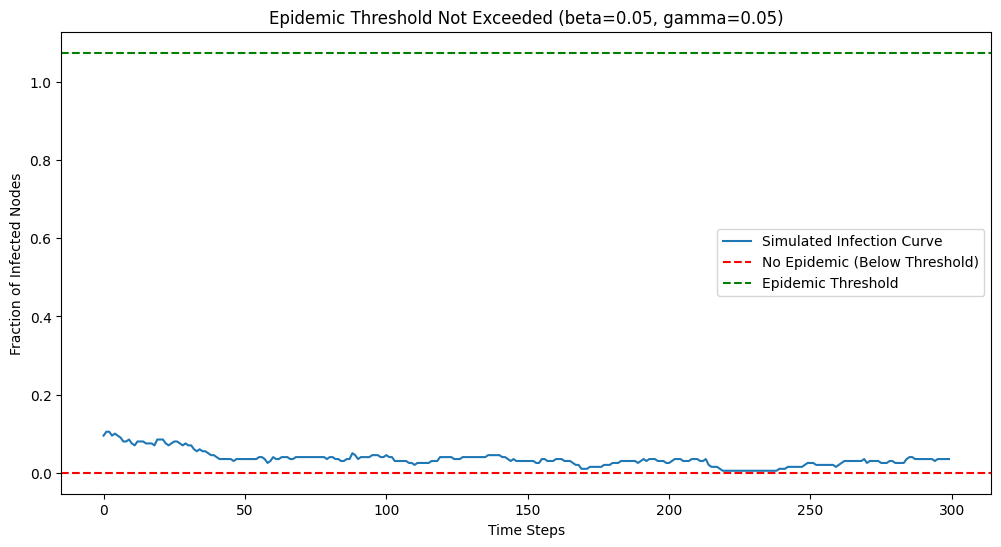

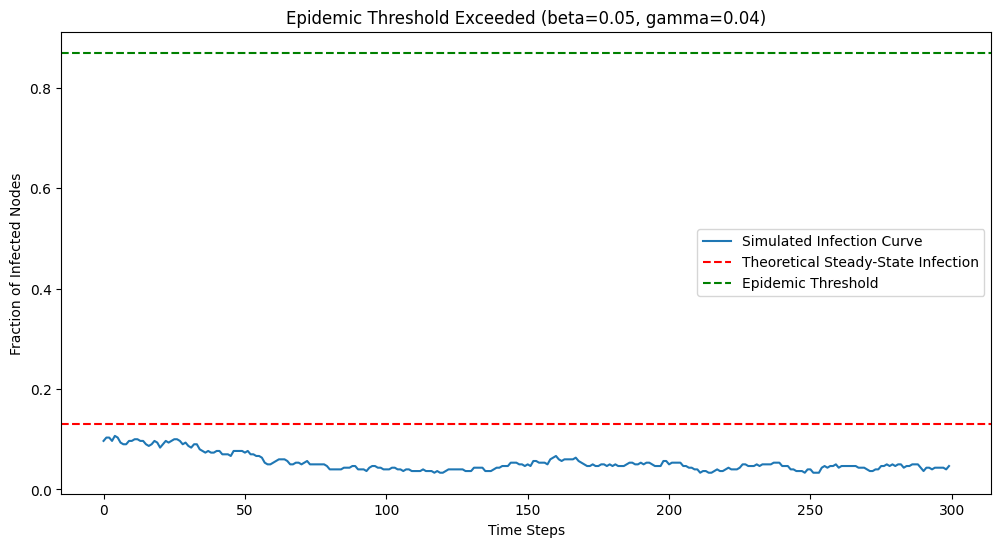

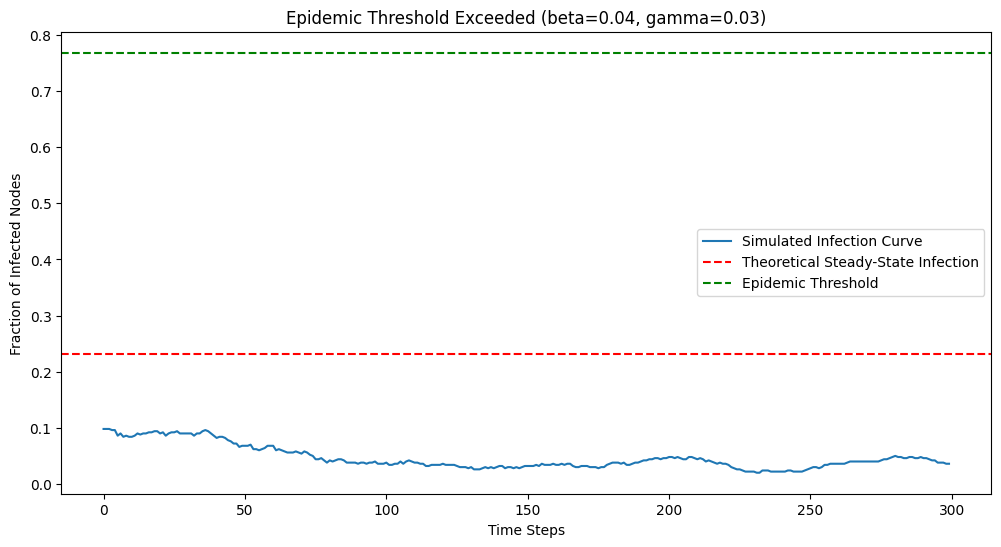

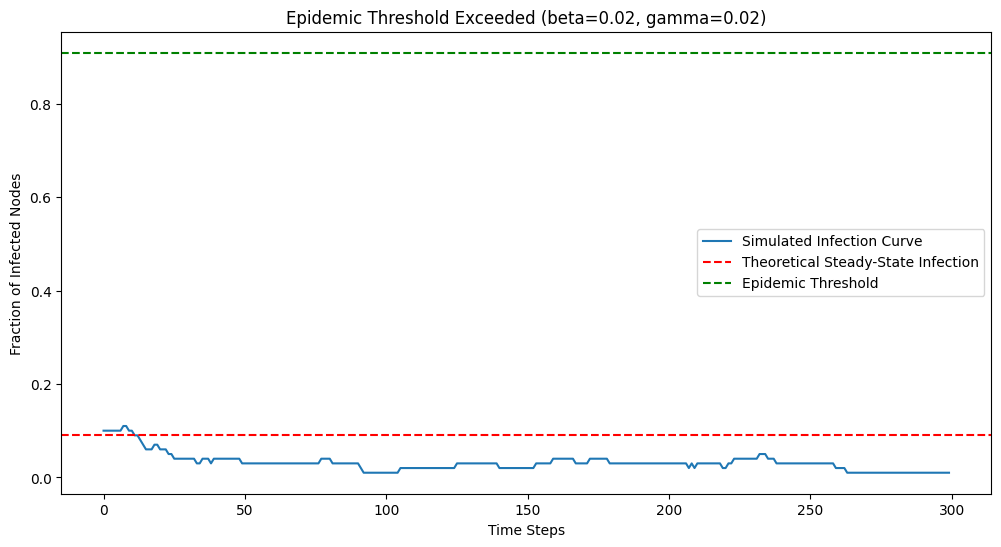

In [9]:
parameters = [
    {'num_nodes': 200, 'probability': 0.005, 'beta': 0.05, 'gamma': 0.05, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 300, 'probability': 0.003, 'beta': 0.05, 'gamma': 0.04, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 500, 'probability': 0.002, 'beta': 0.04, 'gamma': 0.03, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 100, 'probability': 0.01, 'beta': 0.02, 'gamma': 0.02, 'initial_infected_fraction': 0.1, 'num_steps': 300},
]
plot_sis_simulation(parameters)


# 1.2

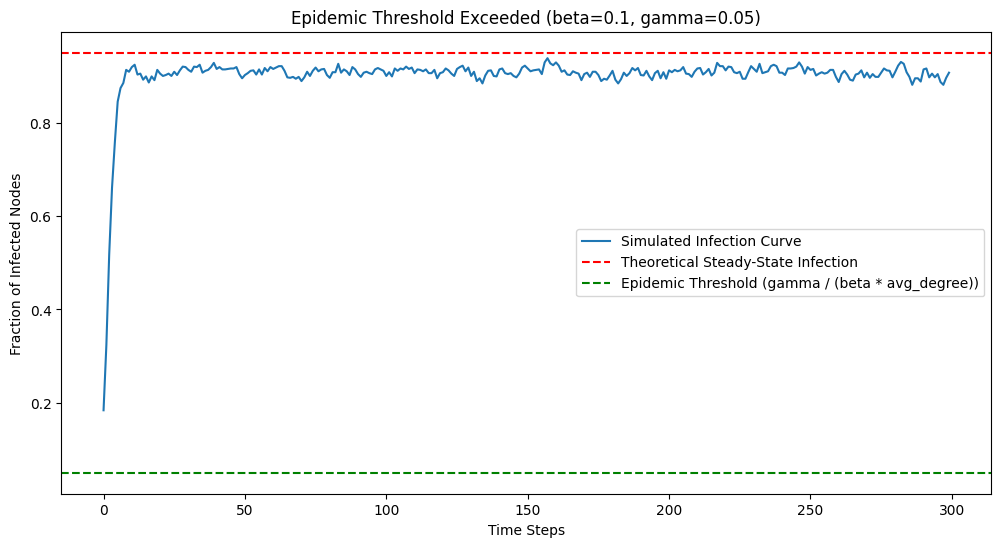

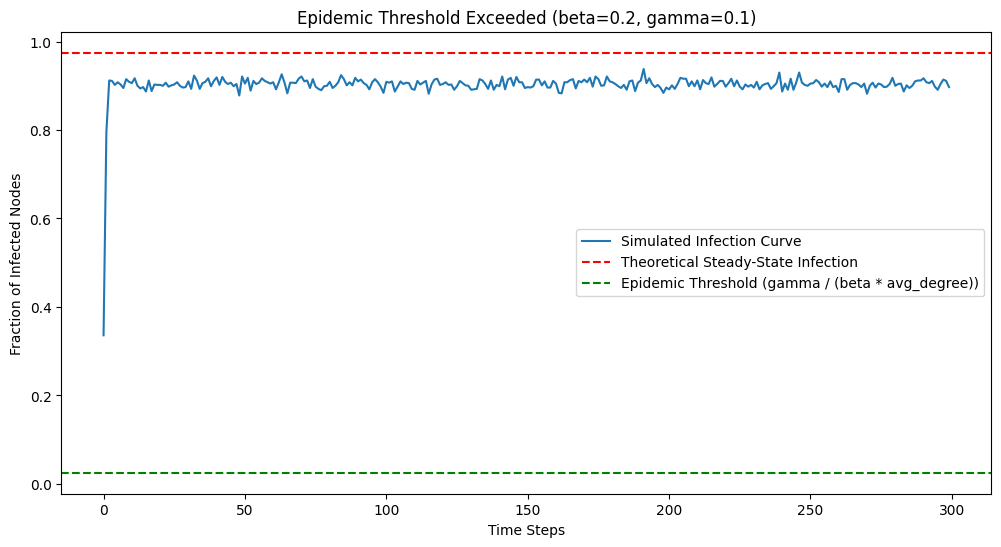

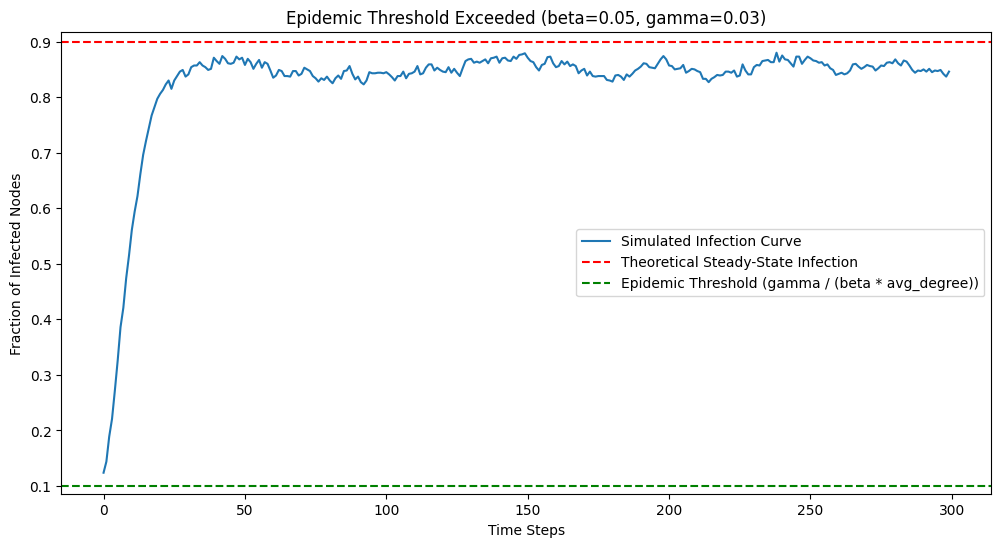

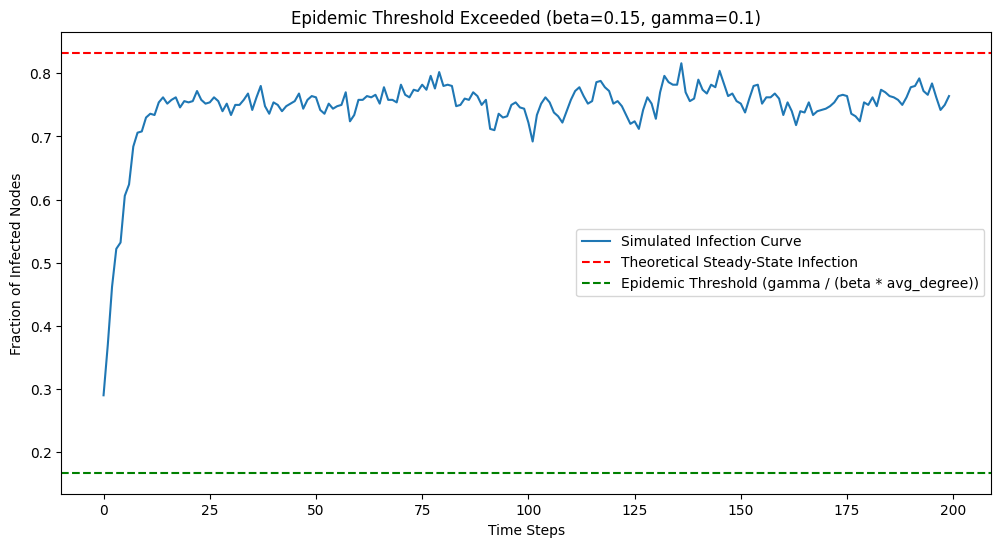

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_sis_ba(num_nodes, m, beta, gamma, initial_infected_fraction, num_steps):
    """
    Simulate the SIS model on a Barabási-Albert graph.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - m: Number of edges to attach from a new node to existing nodes.
    - beta: Infection probability.
    - gamma: Recovery probability.
    - initial_infected_fraction: Initial fraction of infected nodes.
    - num_steps: Number of simulation steps.

    Returns:
    - infection_curve: Fraction of infected nodes at each time step.
    - avg_degree: Average degree of the BA graph.
    - epidemic_threshold: Analytical epidemic threshold (gamma / (beta * avg_degree)).
    - lambda_ratio: Ratio of beta/gamma.
    """
    # Create a Barabási-Albert graph
    G = nx.barabasi_albert_graph(num_nodes, m)

    # Initialize states
    states = {node: 'S' for node in G.nodes}
    initial_infected = random.sample(list(G.nodes), int(initial_infected_fraction * num_nodes))
    for node in initial_infected:
        states[node] = 'I'

    # Average degree of the graph
    degrees = [degree for _, degree in G.degree()]
    avg_degree = np.mean(degrees)

    # Analytical epidemic threshold
    epidemic_threshold = gamma / (beta * avg_degree)
    lambda_ratio = beta / gamma

    infection_curve = []

    # Simulation
    for _ in range(num_steps):
        new_states = states.copy()
        infected_count = 0

        for node in G.nodes:
            if states[node] == 'S':
                # Susceptible node becomes infected with probability based on infected neighbors
                infected_neighbors = [neighbor for neighbor in G.neighbors(node) if states[neighbor] == 'I']
                infection_prob = 1 - (1 - beta) ** len(infected_neighbors)
                if random.random() < infection_prob:
                    new_states[node] = 'I'
            elif states[node] == 'I':
                # Infected node recovers with probability gamma
                if random.random() < gamma:
                    new_states[node] = 'S'

            # Count infected nodes
            if new_states[node] == 'I':
                infected_count += 1

        states = new_states
        infection_curve.append(infected_count / num_nodes)

    return infection_curve, avg_degree, epidemic_threshold, lambda_ratio

def plot_sis_simulation_ba(parameters):
    """
    Simulate and plot the SIS model for different parameter sets on BA networks.

    Parameters:
    - parameters: List of dictionaries with simulation parameters.
    """
    for param in parameters:
        infection_curve, avg_degree, epidemic_threshold, lambda_ratio = simulate_sis_ba(
            param['num_nodes'], param['m'], param['beta'], param['gamma'],
            param['initial_infected_fraction'], param['num_steps']
        )

        plt.figure(figsize=(12, 6))
        plt.plot(infection_curve, label='Simulated Infection Curve')

        # Overlay theoretical steady-state infection level
        if lambda_ratio * avg_degree > 1:
            steady_state_infection = 1 - (1 / (lambda_ratio * avg_degree))
            plt.axhline(steady_state_infection, color='r', linestyle='--', label='Theoretical Steady-State Infection')
            plt.title(f"Epidemic Threshold Exceeded (beta={param['beta']}, gamma={param['gamma']})")
        else:
            plt.axhline(0, color='r', linestyle='--', label='No Epidemic (Below Threshold)')
            plt.title(f"Epidemic Threshold Not Exceeded (beta={param['beta']}, gamma={param['gamma']})")

        plt.axhline(epidemic_threshold, color='g', linestyle='--', label='Epidemic Threshold (gamma / (beta * avg_degree))')
        plt.xlabel('Time Steps')
        plt.ylabel('Fraction of Infected Nodes')
        plt.legend()
        plt.show()

# Test with different parameter sets for BA networks
parameters_ba = [
    {'num_nodes': 1000, 'm': 5, 'beta': 0.1, 'gamma': 0.05, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 1000, 'm': 10, 'beta': 0.2, 'gamma': 0.1, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 1000, 'm': 3, 'beta': 0.05, 'gamma': 0.03, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 500, 'm': 2, 'beta': 0.15, 'gamma': 0.1, 'initial_infected_fraction': 0.2, 'num_steps': 200}
]

plot_sis_simulation_ba(parameters_ba)


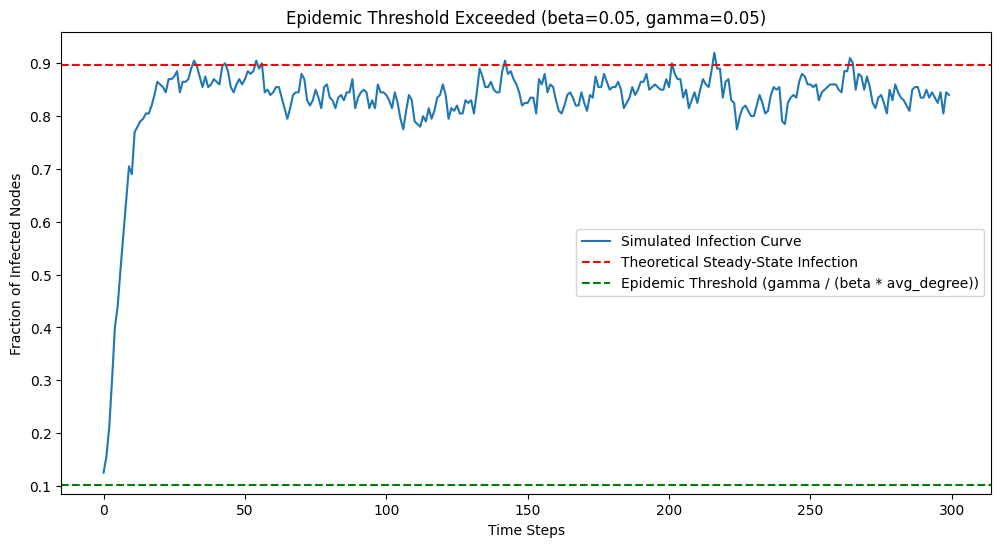

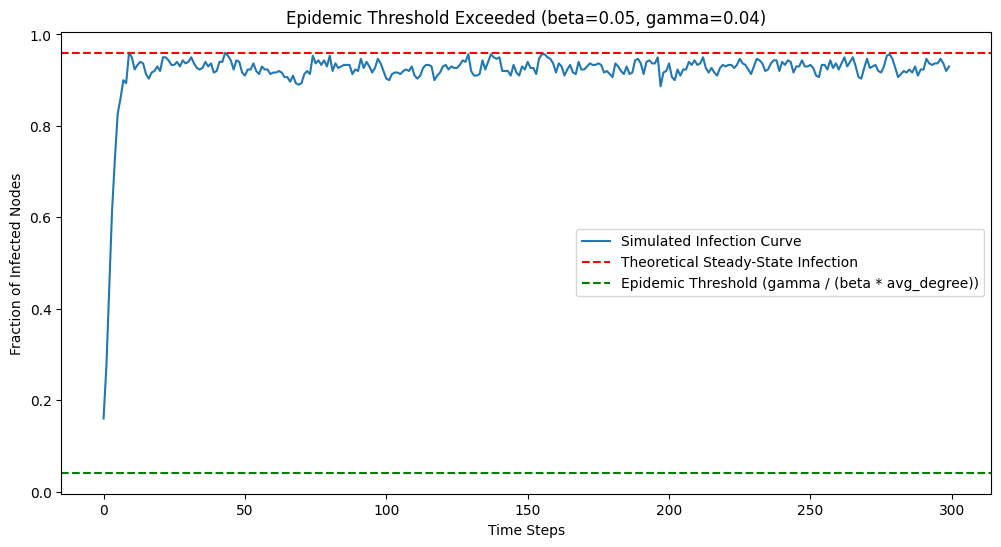

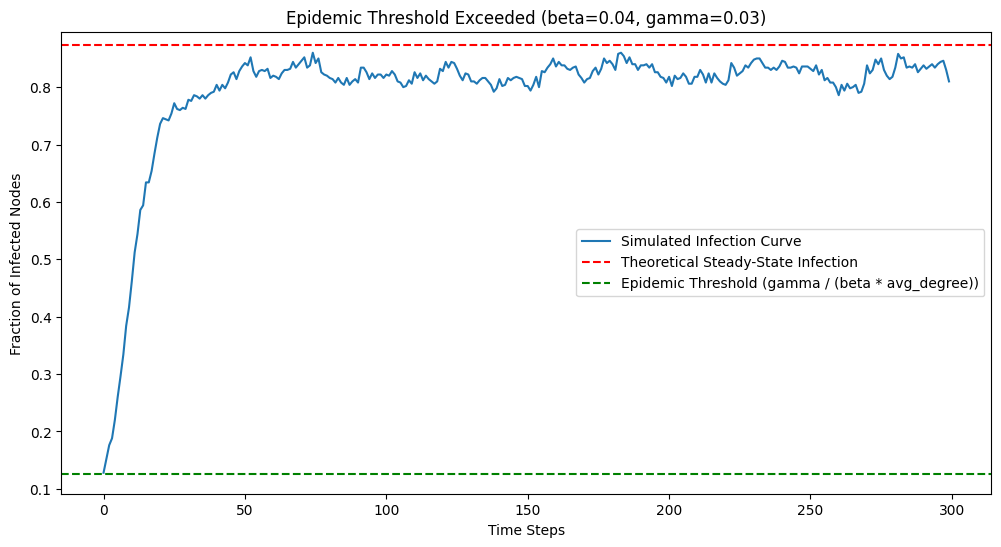

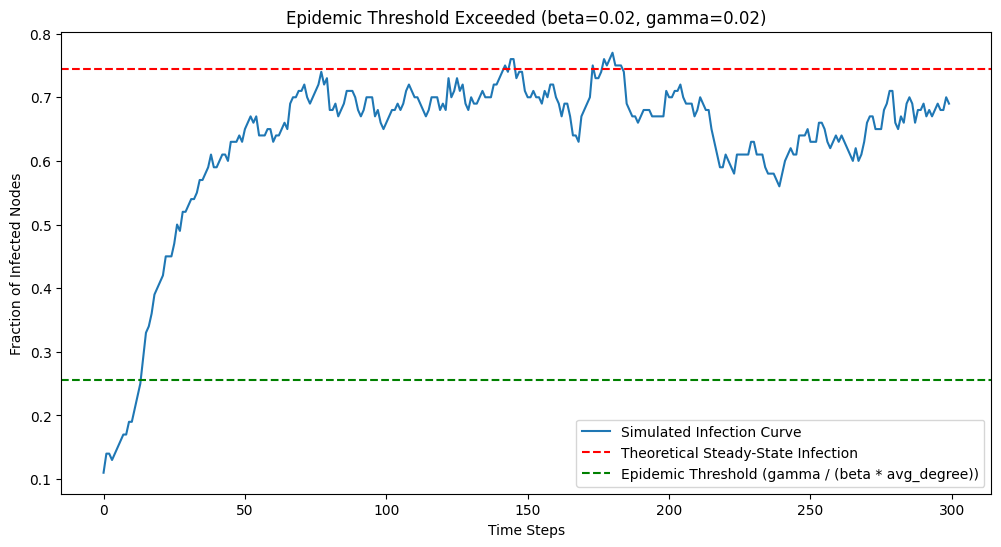

In [13]:
parameters_ba2 = [
    {'num_nodes': 200, 'm': 5, 'beta': 0.05, 'gamma': 0.05, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 300, 'm': 10, 'beta': 0.05, 'gamma': 0.04, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 500, 'm': 3, 'beta': 0.04, 'gamma': 0.03, 'initial_infected_fraction': 0.1, 'num_steps': 300},
    {'num_nodes': 100, 'm': 2, 'beta': 0.02, 'gamma': 0.02, 'initial_infected_fraction': 0.1, 'num_steps': 300},
]

plot_sis_simulation_ba(parameters_ba2)

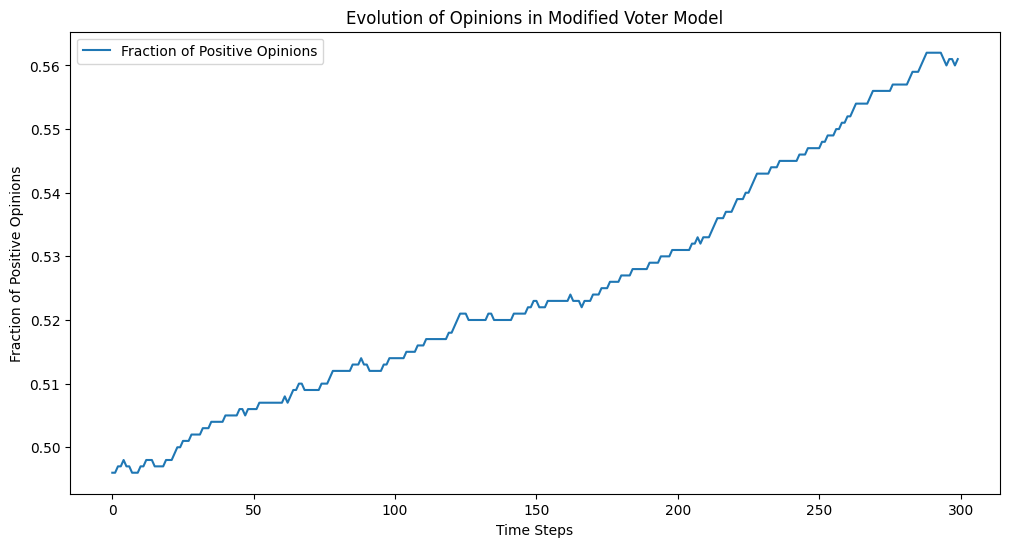

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_voter_model_with_effects(num_nodes, probability, propaganda_bias, ideology_strength, num_steps):
    """
    Simulate the modified voter model on an Erdős-Rényi graph with additional effects like propaganda and agent ideology.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - probability: Probability of edge creation in the ER graph.
    - propaganda_bias: External influence biasing opinion updates.
    - ideology_strength: Resistance of agents to change their opinion.
    - num_steps: Number of simulation steps.

    Returns:
    - opinion_history: List of dictionaries representing the opinions at each step.
    """
    # Create an Erdős-Rényi graph
    G = nx.erdos_renyi_graph(num_nodes, probability)

    # Initialize opinions (-1 or +1)
    opinions = {node: random.choice([-1, 1]) for node in G.nodes}

    opinion_history = []

    # Simulation
    for _ in range(num_steps):
        opinion_history.append(opinions.copy())

        # Randomly select a node
        node = random.choice(list(G.nodes))

        # Calculate the influence from neighbors
        neighbor_influence = sum(opinions[neighbor] for neighbor in G.neighbors(node))

        # Include the effects of propaganda and ideology
        total_influence = neighbor_influence + propaganda_bias

        # Update the opinion based on the sign of the influence
        if random.random() > ideology_strength:  # Agents resist changing their opinion based on ideology
            opinions[node] = np.sign(total_influence) if total_influence != 0 else opinions[node]

    return opinion_history

def plot_voter_model_simulation(opinion_history):
    """
    Plot the evolution of opinions over time.

    Parameters:
    - opinion_history: List of dictionaries representing the opinions at each step.
    """
    num_steps = len(opinion_history)
    num_nodes = len(opinion_history[0])

    opinions_over_time = [
        sum(1 for opinion in opinions.values() if opinion == 1) / num_nodes
        for opinions in opinion_history
    ]

    plt.figure(figsize=(12, 6))
    plt.plot(range(num_steps), opinions_over_time, label='Fraction of Positive Opinions')
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Positive Opinions')
    plt.title('Evolution of Opinions in Modified Voter Model')
    plt.legend()
    plt.show()

# Parameters for the modified voter model
num_nodes = 1000
probability = 0.01
propaganda_bias = 2.0  # External influence favoring positive opinions
ideology_strength = 0.2  # Resistance to opinion change
num_steps = 300

# Simulate the voter model with additional effects
opinion_history = simulate_voter_model_with_effects(
    num_nodes, probability, propaganda_bias, ideology_strength, num_steps
)

# Plot the results
plot_voter_model_simulation(opinion_history)


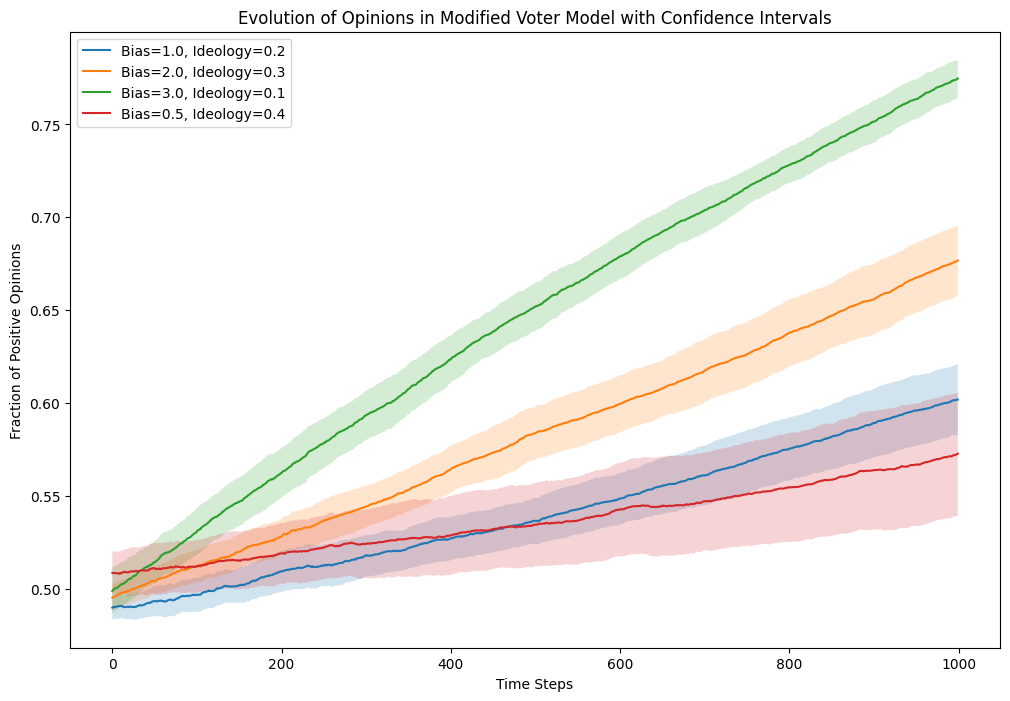

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import sem

def simulate_voter_model_with_effects(num_nodes, probability, propaganda_bias, ideology_strength, num_steps):
    """
    Simulate the modified voter model on an Erdős-Rényi graph with additional effects like propaganda and agent ideology.

    Parameters:
    - num_nodes: Number of nodes in the graph.
    - probability: Probability of edge creation in the ER graph.
    - propaganda_bias: External influence biasing opinion updates.
    - ideology_strength: Resistance of agents to change their opinion.
    - num_steps: Number of simulation steps.

    Returns:
    - opinions_over_time: List representing the fraction of positive opinions at each step.
    """
    # Create an Erdős-Rényi graph
    G = nx.erdos_renyi_graph(num_nodes, probability)

    # Initialize opinions (-1 or +1)
    opinions = {node: random.choice([-1, 1]) for node in G.nodes}

    opinions_over_time = []

    # Simulation
    for _ in range(num_steps):
        opinions_over_time.append(
            sum(1 for opinion in opinions.values() if opinion == 1) / num_nodes
        )

        # Randomly select a node
        node = random.choice(list(G.nodes))

        # Calculate the influence from neighbors
        neighbor_influence = sum(opinions[neighbor] for neighbor in G.neighbors(node))

        # Include the effects of propaganda and ideology
        total_influence = neighbor_influence + propaganda_bias

        # Update the opinion based on the sign of the influence
        if random.random() > ideology_strength:  # Agents resist changing their opinion based on ideology
            opinions[node] = np.sign(total_influence) if total_influence != 0 else opinions[node]

    return opinions_over_time

def plot_multiple_voter_model_simulations(num_runs, parameter_sets):
    """
    Run the voter model simulation for different parameter sets and plot averaged results with confidence intervals.

    Parameters:
    - num_runs: Number of simulation runs to average over for each parameter set.
    - parameter_sets: List of dictionaries containing different simulation parameters.
    """
    plt.figure(figsize=(12, 8))

    for params in parameter_sets:
        all_runs = []

        for _ in range(num_runs):
            opinions_over_time = simulate_voter_model_with_effects(
                params['num_nodes'],
                params['probability'],
                params['propaganda_bias'],
                params['ideology_strength'],
                params['num_steps']
            )
            all_runs.append(opinions_over_time)

        # Average the results and calculate confidence intervals
        all_runs = np.array(all_runs)
        mean_opinions = np.mean(all_runs, axis=0)
        conf_intervals = sem(all_runs, axis=0) * 1.96  # 95% confidence interval

        # Plot the results
        label = f"Bias={params['propaganda_bias']}, Ideology={params['ideology_strength']}"
        plt.plot(range(params['num_steps']), mean_opinions, label=label)
        plt.fill_between(range(params['num_steps']),
                         mean_opinions - conf_intervals,
                         mean_opinions + conf_intervals,
                         alpha=0.2)

    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Positive Opinions')
    plt.title('Evolution of Opinions in Modified Voter Model with Confidence Intervals')
    plt.legend()
    plt.show()

# Parameter sets for the modified voter model
parameter_sets = [
    {'num_nodes': 1000, 'probability': 0.01, 'propaganda_bias': 1.0, 'ideology_strength': 0.2, 'num_steps': 1000},
    {'num_nodes': 1000, 'probability': 0.01, 'propaganda_bias': 2.0, 'ideology_strength': 0.3, 'num_steps': 1000},
    {'num_nodes': 1000, 'probability': 0.01, 'propaganda_bias': 3.0, 'ideology_strength': 0.1, 'num_steps': 1000},
    {'num_nodes': 1000, 'probability': 0.01, 'propaganda_bias': 0.5, 'ideology_strength': 0.4, 'num_steps': 1000}
]

# Run and plot the averaged simulation results with confidence intervals
num_runs = 10
plot_multiple_voter_model_simulations(num_runs, parameter_sets)
